In [1]:
import sys
import os

# Get the current working directory
# Get project root (folder above 'notebooks')
project_root = os.path.dirname(os.getcwd())

# Path to scripts folder
scripts_path = os.path.join(project_root, "scripts")

# Add to sys.path
sys.path.append(project_root)
sys.path.append(scripts_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from analysis import analyze_sentiment,aggregate_sentiment, perform_thematic_analysis ,assign_themes_to_reviews, normalize_text
from config import  DATA_PATHS
from utils import  save_dataframe

Set NLTK data path to: C:\Users\hp\.nltk_data


#### First read and put on memory the cleaded data on **TASK-1**

In [3]:
cleaned_data_df = pd.read_csv('../data/processed/cleaned_data.csv')

In [4]:
cleaned_data_df.head()

,review,rating,date,bank,source
0,CBE ይለያል።,5,2025-11-29,CBE,com.combanketh.mobilebanking
1,it's special for me,5,2025-11-29,CBE,com.combanketh.mobilebanking
2,Make it user friendly.,2,2025-11-29,CBE,com.combanketh.mobilebanking
3,maaliif daddafee install gaafata,3,2025-11-28,CBE,com.combanketh.mobilebanking
4,good app,5,2025-11-28,CBE,com.combanketh.mobilebanking


### ● Sentiment Analysis:

##### compute sentiment scores using **analyze_sentiment** 

In [5]:
# Call the new text normalization function to prepare for thematic analysis
normalized_data_df = normalize_text(cleaned_data_df)


--- Starting Text Normalization (Lemmatization) ---
Text normalization complete. New column 'normalized_review' created.


In [6]:
#  Call the sentiment analysis function
sentiment_df = analyze_sentiment(normalized_data_df)


--- Starting Sentiment Analysis (using VADER) ---
Sentiment analysis complete. Added 'compound_score' and 'sentiment_label'.


In [7]:
sentiment_df.head()

,review,rating,date,bank,source,normalized_review,compound_score,sentiment_label
0,CBE ይለያል።,5,2025-11-29,CBE,com.combanketh.mobilebanking,cbe,0.0000,NEUTRAL
1,it's special for me,5,2025-11-29,CBE,com.combanketh.mobilebanking,special,0.4019,POSITIVE
2,Make it user friendly.,2,2025-11-29,CBE,com.combanketh.mobilebanking,make user friendly,0.4939,POSITIVE
3,maaliif daddafee install gaafata,3,2025-11-28,CBE,com.combanketh.mobilebanking,maaliif daddafee install gaafata,0.0000,NEUTRAL
4,good app,5,2025-11-28,CBE,com.combanketh.mobilebanking,good app,0.4404,POSITIVE


In [8]:
path_to_sentiment = DATA_PATHS['processed'] + '/sentiment_only_data.csv'
save_dataframe(sentiment_df, path_to_sentiment)

DataFrame saved successfully to: ../data/processed/sentiment_only_data.csv


##### Aggregate by bank and rating using **aggregate_sentiment**

In [9]:
# Call the aggregation function
aggregated_results = aggregate_sentiment(sentiment_df)


--- Starting Sentiment Aggregation ---

Mean Compound Score per Bank and Rating:
          bank  rating  mean_compound_score
0    BoAMobile       1            -0.186910
1    BoAMobile       2             0.085867
2    BoAMobile       3             0.150223
3    BoAMobile       4             0.352213
4    BoAMobile       5             0.326581
5          CBE       1            -0.093384
6          CBE       2             0.076877
7          CBE       3             0.134487
8          CBE       4             0.296260
9          CBE       5             0.352840
10  DashenBank       1            -0.139647
11  DashenBank       2             0.007583
12  DashenBank       3             0.236655
13  DashenBank       4             0.375404
14  DashenBank       5             0.452449

Sentiment Label Counts per Bank and Rating:
sentiment_label        bank  rating  NEGATIVE  NEUTRAL  POSITIVE  \
0                 BoAMobile       1      65.0     44.0      25.0   
1                 BoAMobile      


--- Generating Visualization from Returned Aggregation ---


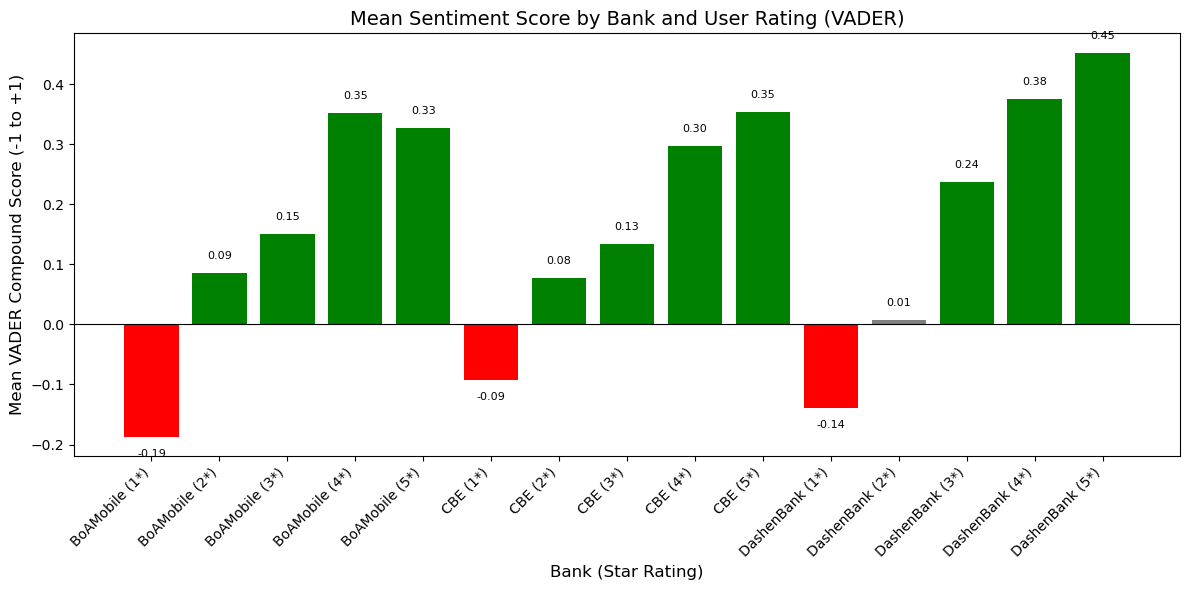

Visualization displayed successfully.


In [10]:
if aggregated_results is not None:
    # --- Start Visualization on Returned Result ---
    print("\n--- Generating Visualization from Returned Aggregation ---")
    
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create a compound key for plotting (Bank_Rating)
    aggregated_results['Bank_Rating'] = aggregated_results['bank'] + ' (' + aggregated_results['rating'].astype(str) + '*)'
    
    # Bar plot of Mean Compound Score
    banks = aggregated_results['Bank_Rating'].tolist()
    scores = aggregated_results['mean_compound_score'].tolist()
    
    # Assign color based on score (Positive/Negative/Neutral)
    colors = ['green' if s >= 0.05 else 'red' if s <= -0.05 else 'gray' for s in scores]

    ax.bar(banks, scores, color=colors)
    
    # Add a horizontal line at 0 for reference
    ax.axhline(0, color='black', linewidth=0.8)
    
    # Labeling and title
    ax.set_title('Mean Sentiment Score by Bank and User Rating (VADER)', fontsize=14)
    ax.set_xlabel('Bank (Star Rating)', fontsize=12)
    ax.set_ylabel('Mean VADER Compound Score (-1 to +1)', fontsize=12)
    ax.set_xticks(np.arange(len(banks)))
    ax.set_xticklabels(banks, rotation=45, ha='right')
    
    # Add score labels on top of bars
    for i, score in enumerate(scores):
        ax.text(i, score + 0.02 * np.sign(score) if score != 0 else 0.02, 
                f'{score:.2f}', ha='center', va='bottom' if score >= 0 else 'top', 
                fontsize=8, color='black')

    plt.tight_layout()
    
    # Show the plot instead of saving it to a file
    plt.show()
    plt.close(fig) # Close the figure to free memory
    
    print(f"Visualization displayed successfully.")
    # --- End Visualization on Returned Result ---

### Thematic Analysis:

* A theme refers to a recurring concept or topic within user reviews. For this challenge, themes will help summarize user feedback into actionable categories for the banks.

* Extract significant keywords and n-grams using TF-IDF or spaCy
(e.g., “login error”, “slow transfer”, “good UI”).
* To aid in grouping these keywords and understanding broader
review topics, you can optionally employ topic modeling
techniques



In [11]:
# D. Call the thematic analysis function (V2)
# It returns both the keyword data and the keyword-to-theme mapping
themed_keywords_df, keyword_to_theme_map =  perform_thematic_analysis(sentiment_df)


--- Starting Thematic Analysis (Keyword Extraction using TF-IDF) ---
Extracted 50 top keywords/n-grams.

--- Thematic Grouping Logic (Documentation) ---
Keywords were grouped into 5 themes based on keyword matching:
 - Account Access & Stability: Matches keywords like 'login, fingerprint, cant, app crashed...'
 - Transaction Performance: Matches keywords like 'transfer, slow, pending, takes long...'
 - User Interface & Experience: Matches keywords like 'interface, design, ui, easy use...'
 - Customer Support & Service: Matches keywords like 'customer service, branch, help, contact...'
 - Feature Requests & Missing Functionality: Matches keywords like 'feature, need, add, option...'

Top Keywords and Their Assigned Themes:
   keyword_phrase               assigned_theme
0             app                Other/General
1            good                Other/General
2            best                Other/General
3            nice                Other/General
4            bank               

In [12]:
themed_keywords_df.head()

,keyword_phrase,tfidf_score,assigned_theme
12,update,22.193647,User Interface & Experience
26,money,17.228825,Transaction Performance
29,slow,16.301783,Transaction Performance
32,need,14.352195,Feature Requests & Missing Functionality
38,transfer,12.118817,Transaction Performance


In [13]:
  #  Assign themes to individual reviews using the mapping
themed_sentiment_df = assign_themes_to_reviews(sentiment_df, keyword_to_theme_map)


--- Starting Theme Assignment to Individual Reviews ---
Theme assignment complete. Added 'identified_themes' column.


In [14]:
themed_sentiment_df['identified_themes'] = themed_sentiment_df['identified_themes'].astype(str).str.replace(r'[\[\]]', '', regex=True)

In [15]:
themed_sentiment_df = themed_sentiment_df[themed_sentiment_df['identified_themes'] != ""]

In [16]:
themed_sentiment_df.head()

,review,rating,date,bank,source,normalized_review,compound_score,sentiment_label,identified_themes
2,Make it user friendly.,2,2025-11-29,CBE,com.combanketh.mobilebanking,make user friendly,0.4939,POSITIVE,'User Interface & Experience'
3,maaliif daddafee install gaafata,3,2025-11-28,CBE,com.combanketh.mobilebanking,maaliif daddafee install gaafata,0.0000,NEUTRAL,'Feature Requests & Missing Functionality'
5,This application is very important and advanta...,5,2025-11-27,CBE,com.combanketh.mobilebanking,application important advantage transfer money...,0.5198,POSITIVE,'Transaction Performance'
14,it suddenly asked me to enter the verification...,1,2025-11-25,CBE,com.combanketh.mobilebanking,suddenly asked enter verification key received...,-0.8746,NEGATIVE,'Customer Support & Service'
17,thanks blc this app help me to use all time,5,2025-11-24,CBE,com.combanketh.mobilebanking,thanks blc app help use time,0.6808,POSITIVE,'Customer Support & Service'


In [19]:
path_themed_sentiment = DATA_PATHS['processed'] + '/hemed_sentiment.csv'
save_dataframe(themed_sentiment_df, path_themed_sentiment)

DataFrame saved successfully to: ../data/processed/hemed_sentiment.csv
